In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Instructions for updating:
Use tf.gfile.GFile.
[[[167 128  73]
  [168 129  74]
  [165 125  73]
  ...
  [133  91  43]
  [133  91  43]
  [132  89  44]]

 [[166 127  72]
  [167 128  73]
  [166 126  74]
  ...
  [132  90  42]
  [132  89  44]
  [132  89  44]]

 [[166 127  72]
  [164 125  70]
  [166 126  74]
  ...
  [134  91  46]
  [132  89  44]
  [132  89  44]]

 ...

 [[131 102  58]
  [131  99  58]
  [129  97  56]
  ...
  [115  82  39]
  [113  80  39]
  [112  81  37]]

 [[131 102  58]
  [131 100  56]
  [131  99  58]
  ...
  [113  78  38]
  [112  79  38]
  [114  81  40]]

 [[131 102  60]
  [131 100  56]
  [132 101  57]
  ...
  [109  75  37]
  [113  79  41]
  [118  85  44]]]


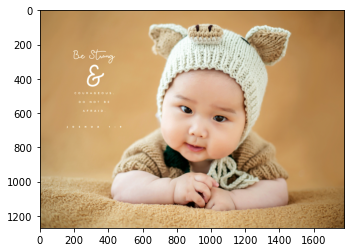

In [4]:
image_raw_data = tf.gfile.FastGFile('baby.JPG','rb').read()

with tf.Session() as sess:
    #对图像 进行jpeg的格式解码从而得到图像对应的三维矩阵
    image_data = tf.image.decode_jpeg(image_raw_data)
    #得到张量
    print(image_data.eval())
    plt.imshow(image_data.eval())
    plt.show()
    

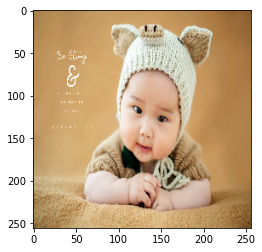

In [5]:
with tf.Session() as sess:
    #用双线性插值法将图像缩放为指定尺寸
    resize = tf.image.resize_images(image_data,[256,256],method=0)
    #tensorflow 的函数处理图片后存储的数据是float32格式的，需要转换为unit8才能正确打印图片
    resize1 = np.asarray(resize.eval(),dtype='uint8')
    plt.imshow(resize1)
    plt.show()

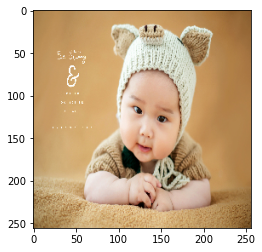

In [6]:
with tf.Session() as sess:
    #用最近邻插值法将图像缩放为指定尺寸
    resize = tf.image.resize_images(image_data,[256,256],method=1)
    #tensorflow 的函数处理图片后存储的数据是float32格式的，需要转换为unit8才能正确打印图片
    resize1 = np.asarray(resize.eval(),dtype='uint8')
    plt.imshow(resize1)
    plt.show()

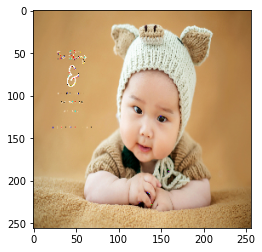

In [7]:
with tf.Session() as sess:
    #用双立方插值法将图像缩放为指定尺寸
    resize = tf.image.resize_images(image_data,[256,256],method=2)
    #tensorflow 的函数处理图片后存储的数据是float32格式的，需要转换为unit8才能正确打印图片
    resize1 = np.asarray(resize.eval(),dtype='uint8')
    plt.imshow(resize1)
    plt.show()

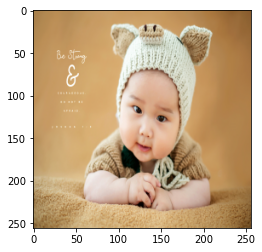

In [8]:
with tf.Session() as sess:
    #用像素区域插值法将图像缩放为指定尺寸
    resize = tf.image.resize_images(image_data,[256,256],method=3)
    #tensorflow 的函数处理图片后存储的数据是float32格式的，需要转换为unit8才能正确打印图片
    resize1 = np.asarray(resize.eval(),dtype='uint8')
    plt.imshow(resize1)
    plt.show()

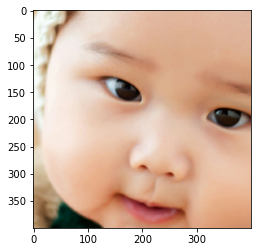

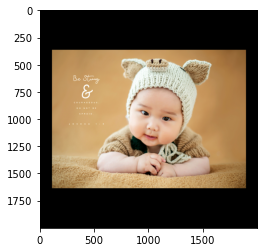

In [11]:
#对图像进行裁剪和缩放 如果目标图像小于原始图像尺寸 则在中心位置裁剪，反之则用黑色素进行填充
#裁剪
with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    croped = tf.image.resize_image_with_crop_or_pad(image_data,400,400)

    plt.imshow(croped.eval())
    plt.show()
#填充
with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    croped = tf.image.resize_image_with_crop_or_pad(image_data,2000,2000)

    plt.imshow(croped.eval())
    plt.show()

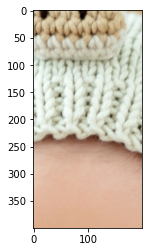

In [16]:
#随机裁剪 
with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    croped = tf.random_crop(image_data,[400,200,3])

    plt.imshow(croped.eval())
    plt.show()

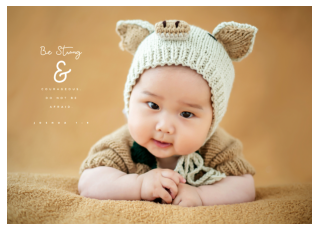

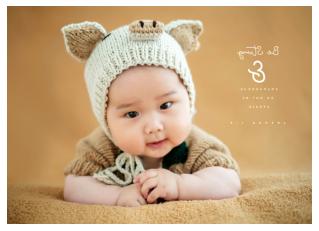

In [17]:
#水平翻转
with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    plt.axis('off')
    plt.show()
    flip_left_right = tf.image.flip_left_right(image_data)

    plt.imshow(flip_left_right.eval())
    plt.axis('off')
    plt.show()

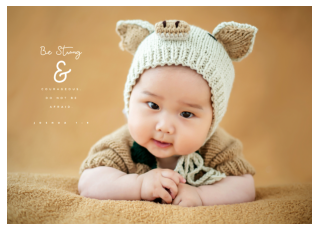

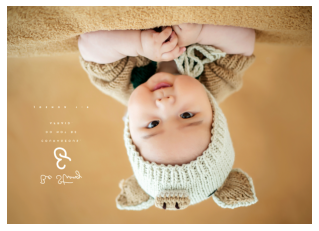

In [18]:
#上下翻转
with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    plt.axis('off')
    plt.show()
    flip_up_down = tf.image.flip_up_down(image_data)

    plt.imshow(flip_up_down.eval())
    plt.axis('off')
    plt.show()

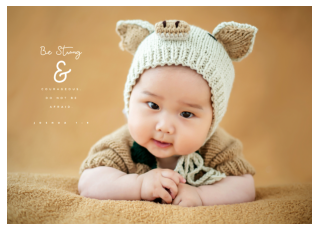

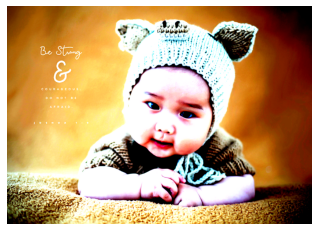

In [22]:
#改变对比度
with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    plt.axis('off')
    plt.show()
    #将对比度降低至原来的二分之一
#     contrast = tf.image.adjust_contrast(image_data,0.5)
    #随机、调节对比度
    contrast = tf.image.random_contrast(image_data,lower=0.2,upper=5)

    

    plt.imshow(contrast.eval())
    plt.axis('off')
    plt.show()

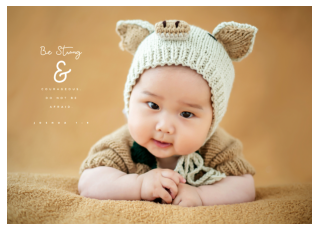

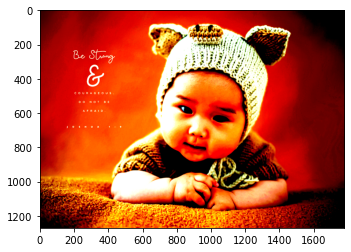

In [25]:
#白化处理 将图像的像素值转化为零均值和单位方差
with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    plt.axis('off')
    plt.show()

    standardization = tf.image.per_image_standardization(image_data)

    

    plt.imshow(np.asarray(standardization.eval(),dtype='uint8'))

    plt.show()